In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("insurance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

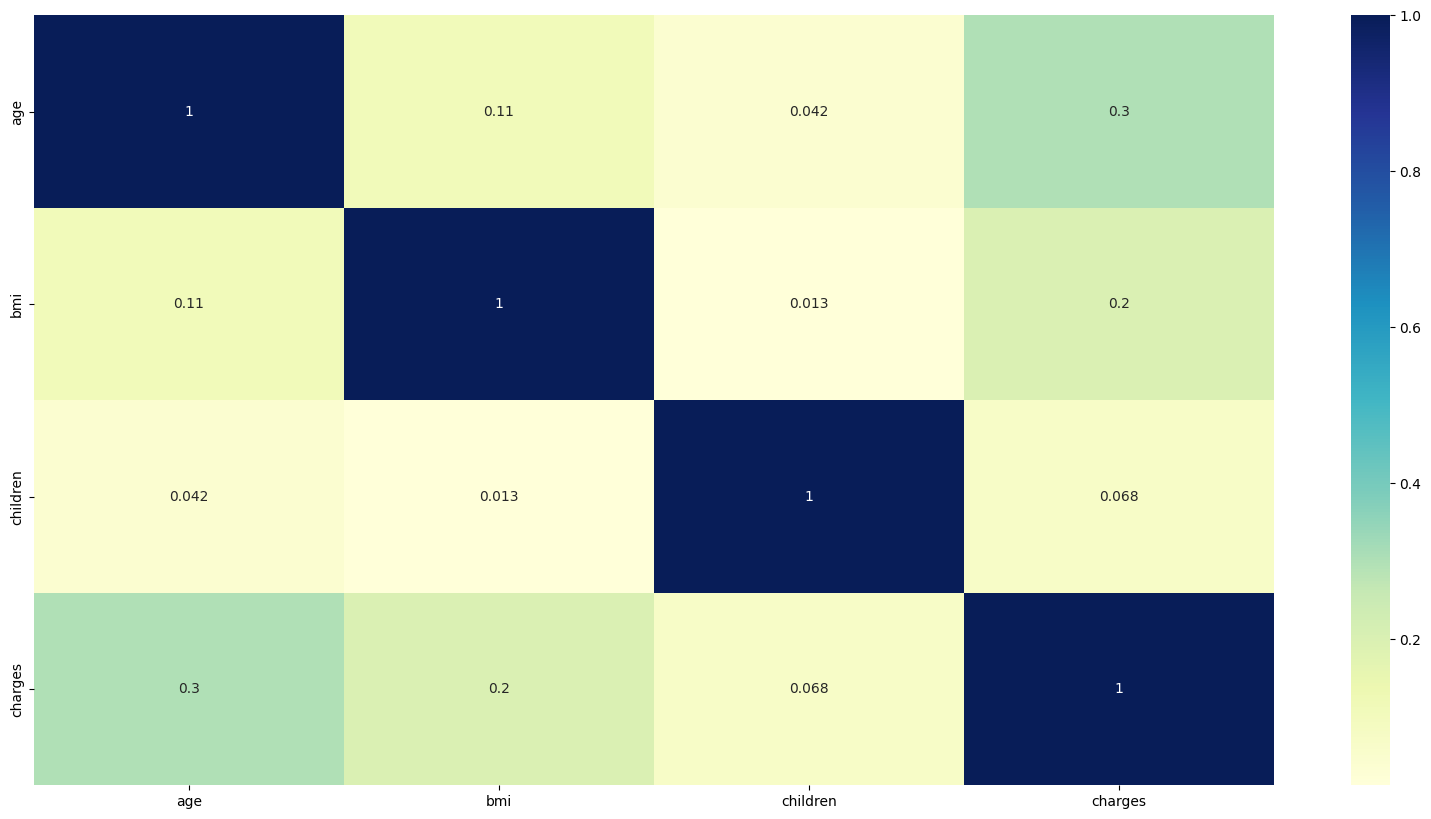

In [ ]:
plt.figure(figsize=(20,10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot= True, cmap="YlGnBu")

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
X_test[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: R² = {r2:.2f}")


Linear Regression: R² = 0.78
Decision Tree: R² = 0.72
Random Forest: R² = 0.87
Gradient Boosting: R² = 0.88
Ridge Regression: R² = 0.78
Lasso Regression: R² = 0.78


In [ ]:
# using gradient boostung for predictions
linear_reg = GradientBoostingRegressor()
linear_reg.fit(X_train, y_train)
y_pred_test = linear_reg.predict(X_test)

# Displaying a comparison of actual vs predicted charges
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
print(comparison_df.head(10))  # Show the first 10 predictions

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Linear Regression: R² = {r2:.2f}")


           Actual     Predicted
764    9095.06825  10825.369522
887    5272.17580   5794.881352
890   29330.98315  27836.174124
1293   9301.89355  10011.452146
259   33750.29180  33446.034083
1312   4536.25900   5410.894701
899    2117.33885   3522.884922
752   14210.53595  16800.836409
1286   3732.62510   4661.392909
707   10264.44210  10985.281470
Linear Regression: R² = 0.88
